In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df_train = pd.read_csv("titanic_train.csv")

In [8]:
df_train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [9]:
df_test = pd.read_csv("titanic_test.csv")
# df_train = pd.read_csv("data/titanic_train.csv")

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-null    int64  
 1   survived   393 non-null    int64  
 2   name       393 non-null    object 
 3   sex        393 non-null    object 
 4   age        305 non-null    float64
 5   sibsp      393 non-null    int64  
 6   parch      393 non-null    int64  
 7   ticket     393 non-null    object 
 8   fare       393 non-null    float64
 9   cabin      81 non-null     object 
 10  embarked   393 non-null    object 
 11  body       36 non-null     float64
 12  home.dest  218 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB


In [11]:
# 불필요한 피처 값들을 삭제 (중복실행시 에러 발생 주의)

df_train = df_train.drop(['name','ticket','body','cabin','home.dest'], axis =1)


In [12]:
df_train.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,2,1,female,13.0,0,1,19.5000,S
1,2,1,female,4.0,1,1,23.0000,S
2,2,1,female,30.0,1,0,13.8583,C
3,3,0,male,NaN,0,0,7.7250,Q
4,3,1,female,22.0,0,0,7.7250,Q


In [13]:
df_test = df_test.drop(['name','ticket','body','cabin','home.dest'], axis =1)

In [14]:
df_test.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,3,0,male,38.0,0,0,7.8958,S
1,2,1,female,21.0,0,1,21.0000,S
2,2,0,male,42.0,1,0,27.0000,S
3,3,0,male,NaN,0,0,14.5000,S
4,2,0,male,25.0,0,0,31.5000,S


In [15]:
print(df_train['survived'].value_counts())
# 1 : 생존자 ,   0 : 아닌경우

0    563
1    353
Name: survived, dtype: int64


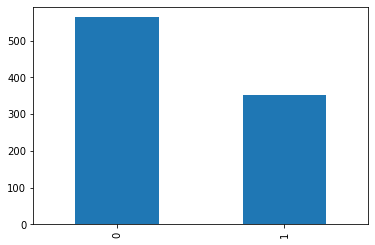

In [16]:
df_train['survived'].value_counts().plot.bar()

In [17]:
# survived 피처를 기준으로 그룹을 나누어 그룹별 pclass 피처의 분포를 살펴보자
# pclass 승객 등급

print(df_train['pclass'].value_counts())

3    498
1    230
2    188
Name: pclass, dtype: int64


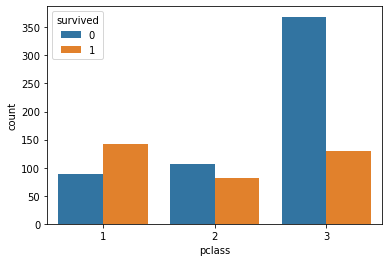

In [18]:
ax = sns.countplot(x='pclass', hue = 'survived', data = df_train)

In [19]:
# 변수 탐색작업 자동화 함수


from scipy import stats

# 두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수를 정의합니다.
def valid_features(df, col_name, distribution_check=True):
    
    # 두 집단 (survived=1, survived=0)의 분포 그래프를 출력합니다.
    g = sns.FacetGrid(df, col='survived')
    g.map(plt.hist, col_name, bins=30)

    # 두 집단 (survived=1, survived=0)의 표준편차를 각각 출력합니다.
    titanic_survived = df[df['survived']==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_survived_static))
    titanic_n_survived = df[df['survived']==0]
    titanic_n_survived_static = np.array(titanic_n_survived[col_name])
    print("data std is", '%.2f' % np.std(titanic_n_survived_static))
    
     # T-test로 두 집단의 평균 차이를 검정합니다.
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_n_survived[col_name], equal_var=False)
    print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)
    
    if distribution_check:
        # Shapiro-Wilk 검정 : 분포의 정규성 정도를 검증합니다.
        print("The w-statistic and p-value in Survived %.3f and %.3f" % stats.shapiro(titanic_survived[col_name]))
        print("The w-statistic and p-value in Non-Survived %.3f and %.3f" % stats.shapiro(titanic_n_survived[col_name]))


data std is 14.22
data std is 13.71
The t-statistic and p-value assuming equal variances is -0.546 and 0.585.
The t-statistic and p-value not assuming equal variances is -0.543 and 0.587
The w-statistic and p-value in Survived 0.982 and 0.001
The w-statistic and p-value in Non-Survived 0.968 and 0.000


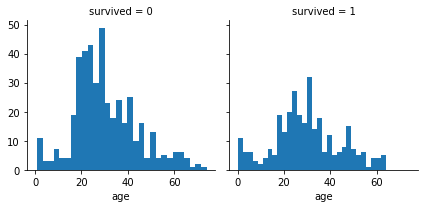

In [20]:
# 함수 실행 age, sibsp

valid_features(df_train[df_train['age']>0],'age',distribution_check=True)

data std is 0.64
data std is 1.34
The t-statistic and p-value assuming equal variances is -2.118 and 0.034.
The t-statistic and p-value not assuming equal variances is -2.446 and 0.015


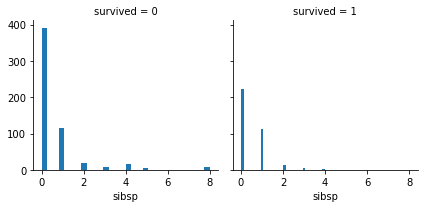

In [21]:
valid_features(df_train,'sibsp',distribution_check=False)
#sibsp 동승한 형제 또는 배우자 수

TypeError: unsupported operand type(s) for /: 'str' and 'int'

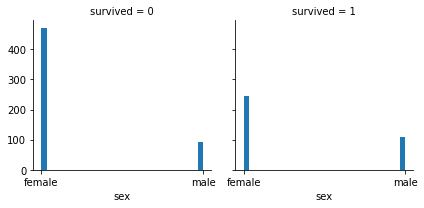

In [22]:
# parch : 동승한 부모 또는 자녀수
# sex : 탑승자의 성별

valid_features(df_train,'sex',distribution_check=True)
#sibsp 동승한 형제 또는 배우자 수

In [ ]:
valid_features(df_train,'parch',distribution_check=True)

In [ ]:
valid_features(df_train,'pclass',distribution_check=True)

# pclass (고객등급)          영향을 미친다.
# age (나이)                :  ?
# sibsp, parch (동승자)     :  ?
# sex (성)                   영향을 미친다. 




In [ ]:
# 로지스틱 회귀 모델 
# 기존의 회귀 분석의 예측값 Y를 0~1 사이의 값으로 제한
# ***** 0.5보다 크면       1         0.5 작으면        0 *****'
# 으로 분류하는 방법 , 계수 분석을 통한 피처의 영향력 해석이 용이하다는 장점



# 전처리 1) 결측이 존재하는 데이터를 삭제  : 처리가 쉽다 주관이 개입될 여지가 없다. 
#        2) 평균값, 또는 중앙값 또는 최빈값 등의 임의의 수치로 채워 넣는 방법
#           : 데이터를 모두 분석에 활용할수 있는 점이 장점인 반면에 
#             수치 왜곡의 가능성이 있다. 

# 2)번 방법을 사용하여 전처리

# age의 결측값을 평균값으로 대체하자
replace_mean = df_train[df_train['age'] > 0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

#embark의 결측값을 최빈값 대체하자
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

# 원-핫 인코딩, (카테고리 정규화)
# 통합 데이터 프레임 (whwole_df) 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)

# pandas 패키지를 이용해서 원-핫 인코딩 수행
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[:train_idx_num]

df_train.head()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# 데이터를 학습 데이터와 테스트 데이터로 분리

x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values

In [ ]:
# 로지스틱 회귀 모델 학습

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

In [ ]:
y_pred = lr.predict(x_test)
print(y_pred)

In [ ]:
y_pred_p = lr.predict_proba(x_test)[:,1]
print(y_pred_p)

In [28]:
# 분류 모델 평가
# 테스트 데이터에 대한 정확도, 정밀도, 특이도, 평가 지표

print("정확도 :%.2f" % accuracy_score(y_test, y_pred))
print("정밀도 :%.2f" % precision_score(y_test, y_pred))
print("특이도 :%.2f" % recall_score(y_test, y_pred))
print("평가지표 :%.2f" % f1_score(y_test, y_pred))


NameError: name 'accuracy_score' is not defined

In [29]:
# 로지스틱 회귀 모델과 더불어 분류 분석의 가장 대표적인 방법인 
# 의사결정나무(Decision Tree) 모델을 적용해 보자

# 의사결정나무 모델은 피처 단위로 조건을 분기하여 정답의 집합을 좁혀나가는 방법
# 마치 스무고개 놀이에서 정답을 찾아 나가는 과정과 유사하다. 

#                         남자?
#                     예        노
#                 나이 > 10?        생존  0.73
#              예            노
#         사망                  가족
#     0.17%                  사망    생존
    
    
from sklearn.tree import DecisionTreeClassifier    

# 의사 결정 나무를 학습하고, 학습한 모델로 테스트 데이터셋에 대한 예측값을 반환한다.
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

print(y_pred)

y_pred_p = dtc.predict_proba(x_test)[:,1]
print(y_pred_p)


NameError: name 'x_train' is not defined

In [30]:
# 분류 모델 평가
# 테스트 데이터에 대한 정확도, 정밀도, 특이도, 평가 지표

print("정확도 :%.2f" % accuracy_score(y_test, y_pred))
print("정밀도 :%.2f" % precision_score(y_test, y_pred))
print("특이도 :%.2f" % recall_score(y_test, y_pred))
print("평가지표 :%.2f" % f1_score(y_test, y_pred))

# 회귀분석 결과와 비교
# 정확도 :0.79
# 정밀도 :0.73
# 특이도 :0.70
# 평가지표 :0.72

NameError: name 'accuracy_score' is not defined

In [31]:
##########################################
# 모델 개선
##########################################

# 분류 모델의 성능을 더욱 끌어올리기 위해서...
# 1) 좋은 분류 기법을 사용해야 한다. 
# 2) 더 많은 데이터를 사용한다. 

# 3) 피처 엔지니어링 Feature Engineering
#    피처 엔지니어링은 모델에 사용할 피처를 가공하는 분석 작업을 말한다. 



df_test = pd.read_csv("titanic_test.csv")
df_train = pd.read_csv("titanic_train.csv")



In [32]:
# 전처리

# age의 결측값을 평균값으로 대체하자
replace_mean = df_train[df_train['age'] > 0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

#embark의 결측값을 최빈값 대체하자
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

# 원-핫 인코딩, (카테고리 정규화)
# 통합 데이터 프레임 (whwole_df) 생성
whole_df = df_train.append(df_test)
train_idx_num = len(df_train)


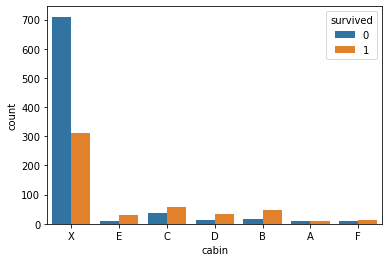

In [33]:
#피처 엔지니어링 & 전처리 

# cabin 피처 활용

# 결측 데이터를 'X' 대체
whole_df['cabin'] = whole_df['cabin'].fillna('X')

# cabin 피처의 첫 번째 알파벳을 추출하다.
whole_df['cabin'] = whole_df['cabin'].apply(lambda x:x[0])

# 추출한 알파벳 중에 G T 수가 너무작기 때문에 X 대체
whole_df['cabin'] = whole_df['cabin'].replace({"G":"X", "T":"X"})

ax = sns.countplot(x='cabin', hue = 'survived', data = whole_df)
plt.show()

In [34]:
# name 피처  성 호칭 이름

whole_df.head()

name_grade = whole_df['name'].apply(lambda x : x.split(", ",1)[1].split(".")[0])
name_grade = name_grade.unique().tolist()
print(name_grade)


['Miss', 'Mr', 'Master', 'Mrs', 'Dr', 'Mlle', 'Col', 'Rev', 'Ms', 'Mme', 'Sir', 'the Countess', 'Dona', 'Jonkheer', 'Lady', 'Major', 'Don', 'Capt']


In [35]:
# 호칭에 따라서 사회적 지위를 정의  (1910 기준)
grade_dict = {'A':['Rev','Col','Major','Dr','Capt','Sir'],
             'B':['Ms','Mme','Mrs','Dona'],
             'C':['Jonkheer','the COuntess'],
             'D':['Mr','Don'],
             'E':['Master'],
             'F':['Miss','Mlle','Lady']}

In [36]:
def give_grade(x):
    grade = x.split(", ", 1)[1].split(".")[0]
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'

whole_df['name'] = whole_df['name'].apply(lambda x : give_grade(x))
print(whole_df['name'].value_counts())

D    758
F    263
B    201
E     61
A     24
G      1
C      1
Name: name, dtype: int64


In [74]:
print(whole_df)

     pclass  survived name     sex        age  sibsp  parch         ticket  \
0         2         1    F  female  13.000000      0      1         250644   
1         2         1    F  female   4.000000      1      1          29103   
2         2         1    F  female  30.000000      1      0  SC/PARIS 2148   
3         3         0    D    male  30.231444      0      0          36209   
4         3         1    F  female  22.000000      0      0         334914   
..      ...       ...  ...     ...        ...    ...    ...            ...   
388       3         0    D    male  33.000000      0      0         347465   
389       2         1    B  female  31.000000      0      0       CA 31352   
390       3         1    D    male  30.231444      0      0         368402   
391       3         0    D    male  30.231444      0      0         383121   
392       1         1    F  female  33.000000      0      0         113781   

         fare cabin embarked  body  \
0     19.5000     X      

In [37]:
whole_df_encoded = pd.get_dummies(whole_df)
df_train = whole_df_encoded[:train_idx_num]
df_test = whole_df_encoded[:train_idx_num:]
df_train.head()

,pclass,survived,age,sibsp,parch,fare,body,name_A,name_B,name_C,...,"home.dest_Wimbledon Park, London / Hayling Island, Hants","home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,2,1,13.000000,0,1,19.5000,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,4.000000,1,1,23.0000,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,30.000000,1,0,13.8583,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,30.231444,0,0,7.7250,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,22.000000,0,0,7.7250,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# 데이터를 학습 데이터와 테스트 데이터로 분리

x_train, y_train = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values
x_test, y_test = df_train.loc[:, df_train.columns != 'survived'].values, df_train['survived'].values

In [39]:
# 로지스틱 회귀 모델 학습

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

NameError: name 'LogisticRegression' is not defined

In [40]:
# 결측 데이터를 'X' 대체
whole_df['body'] = whole_df['body'].fillna('0')

In [41]:
df_train.head(10)

,pclass,survived,age,sibsp,parch,fare,body,name_A,name_B,name_C,...,"home.dest_Wimbledon Park, London / Hayling Island, Hants","home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,2,1,13.000000,0,1,19.5000,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,4.000000,1,1,23.0000,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,30.000000,1,0,13.8583,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,30.231444,0,0,7.7250,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,22.000000,0,0,7.7250,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,0,30.231444,0,0,7.8792,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,30.000000,0,0,56.9292,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,1,2.000000,1,1,26.0000,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,49.000000,1,1,110.8833,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,35.000000,0,0,26.2875,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
